In [1]:
import matplotlib.pyplot as plt
import pandas
import os
import pandas as pd

# Loss

In [10]:
def plot_loss(loss_filename):
    lp = pd.read_csv(loss_filename, delimiter=";")
    lp.columns = ['epoch','loss','lr','momentum']
    lp["iteration"] = lp.groupby('lr').cumcount()
    sns.set_palette("hls")
    f, ax = plt.subplots(figsize=(10, 5))
    ax.set(yscale="log")
    sns.lineplot(x="iteration",y='loss',data=lp,hue=lp.lr.apply(str))
    plt.ylabel("log loss")

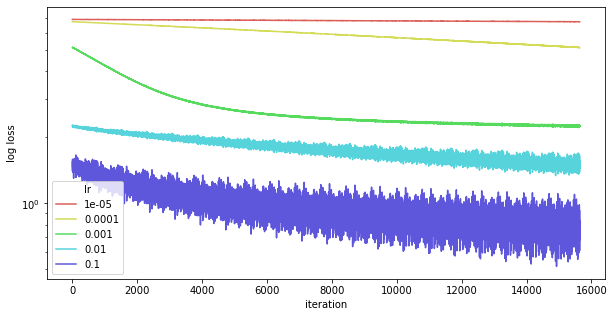

In [26]:
plot_loss("losses/LP.csv")

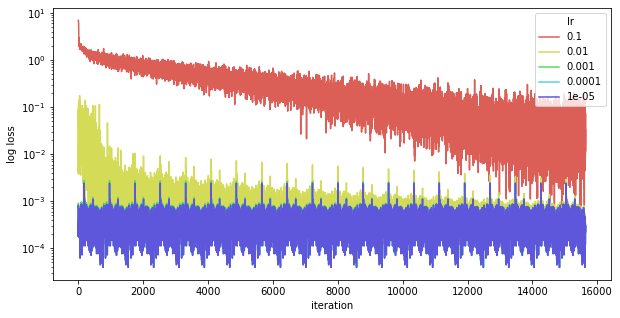

In [27]:
plot_loss("losses/FT.csv")

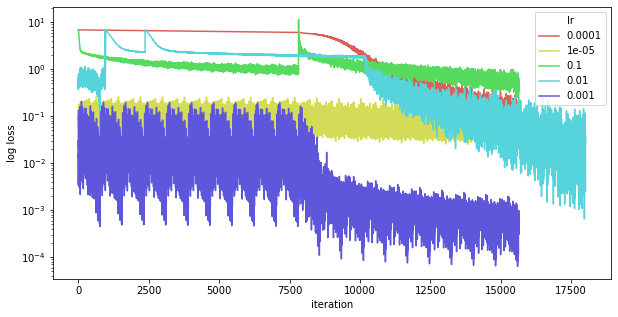

In [28]:
plot_loss("losses/LPFT.csv")

# Wyniki modeli

In [35]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import utils

In [37]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

transform = transforms.Compose(
    [transforms.ToTensor(),
     # normalize if needed
     ])

cifar_transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.485, 0.456, 0.406), (0.228, 0.224, 0.225)),
     ])

stl_transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.485, 0.456, 0.406), (0.228, 0.224, 0.225)),
     ])

download = False

# load datasets
trainloader10, testloader10 = utils.load_cifar_10_dataset(download=download, transform=cifar_transform)
_, testloader101 = utils.load_cifar_10_1_dataset(download=download, transform=cifar_transform)
_, testloaderSTL = utils.load_STL_10_dataset(download=download, transform=stl_transform)


Using cuda device


### Best results by lr

|flavor|lr|cifar10_acc|cifar101_acc|stl_acc|
|------|--|-----------|------------|-------|
|LPFT|0.0001|0.936|0.8615|0.452|
|LP|0.1|0.7662|0.627|0.410375|
|FT|0.01 - 1e-05|0.8587|0.7565|0.306625|
 
 
### All results
flavor|cifar10_acc|cifar101_acc|stl_all|num_epochs|lr|momentum
------|-----------|------------|-------|---|--|--------
LPFT|0.6826|0.557|0.282375|20|0.1|0.9
LPFT|0.9068|0.8205|0.3835|20|0.01|0.9
LPFT|0.9327|0.8545|0.40125|20|0.001|0.9
LPFT|0.936|0.8615|0.452|20|0.0001|0.9
LPFT|0.9348|0.8595|0.45025|20|1e-05|0.9
FT|0.8299|0.725|0.281125|20|0.1|0.9
FT|0.8583|0.756|0.30625|20|0.01|0.9
FT|0.8587|0.7565|0.306625|20|0.001|0.9
FT|0.8587|0.7565|0.306625|20|0.0001|0.9
FT|0.8587|0.7565|0.306625|20|1e-05|0.9
LP|0.1012|0.1015|0.098375|20|1e-05|0.9
LP|0.2442|0.1955|0.145125|20|0.0001|0.9
LP|0.6133|0.5105|0.258125|20|0.001|0.9
LP|0.6735|0.55|0.304375|20|0.01|0.9
LP|0.7662|0.627|0.410375|20|0.1|0.9

In [45]:
# eval model by finger
model_path = "results/LP_0.1.pt"
model = models.resnet50() 
checkpoint_dict = torch.load(model_path)
model.load_state_dict(checkpoint_dict, strict=False)

<All keys matched successfully>

In [43]:
cifar10_acc = utils.test(model, testloader10)
cifar101_acc = utils.test(model, testloader101)
stl_acc = utils.test(model, testloaderSTL)

Accuracy: 76.62% on Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.228, 0.224, 0.225))
           )
Accuracy: 62.7% on Dataset CIFAR10_1
    Number of datapoints: 2000
    Root Location: ./data
    Transforms (if any): Compose(
                             Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                             ToTensor()
                             Normalize(mean=(0.485, 0.456, 0.406), std=(0.228, 0.224, 0.225))
                         )
    Target Transforms (if any): None
Accuracy: 41.0375% on Dataset STL10
    Number of datapoints: 8000
    Root location: ./data
    Split: test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolati

In [44]:
cifar10_acc, cifar101_acc, stl_acc

(0.7662, 0.627, 0.410375)